# Import Packages

In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.ticker as tkr
import seaborn as sns
from historical_stock_data_preparation import main as prep
sns.set()

## Setup Data

In [12]:
df = pd.read_csv('../Dataset/crypto/BTCUSDT_data.csv', parse_dates=['Timestamp'], index_col='Timestamp')
df = prep(df)
df.to_csv('../Dataset/crypto/BTCUSDT_data_prepared.csv')
df.head()
df_yfinance_full_btc = df


# Import Data

## BTC

In [13]:
df_yfinance_full_btc.head(5)

,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,...,close_diff_Lower_Bollinger,Bollinger_indicator,Bollinger_indicator_before_1,Bollinger_indicator_before_2,Bollinger_indicator_before_3,Bollinger_indicator_before_4,true_range,date,weekday,time
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-17 04:59:59.999,202366.138393,171,35.160503,150952.477943,...,NaN,NaN,NaN,NaN,NaN,NaN,52.30,17,3,7
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 05:59:59.999,100304.823567,102,21.448071,92608.279728,...,12.423246,2.0,NaN,NaN,NaN,NaN,37.32,17,3,7
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 06:59:59.999,31282.312670,36,4.802861,20795.317224,...,23.772462,2.0,2.0,NaN,NaN,NaN,36.08,17,3,7
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 07:59:59.999,19241.058300,25,2.602292,11291.347015,...,61.506562,2.0,2.0,2.0,NaN,NaN,62.58,17,3,7
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 08:59:59.999,4239.503586,28,0.814655,3552.746817,...,73.800808,2.0,2.0,2.0,2.0,NaN,44.53,17,3,7


In [14]:
df_yfinance_full_btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55831 entries, 2017-08-17 04:00:00 to 2024-01-04 18:00:00
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open                          55831 non-null  float64
 1   High                          55831 non-null  float64
 2   Low                           55831 non-null  float64
 3   Close                         55831 non-null  float64
 4   Volume                        55831 non-null  float64
 5   Close Time                    55831 non-null  object 
 6   Quote Asset Volume            55831 non-null  float64
 7   Number of Trades              55831 non-null  int64  
 8   Taker Buy Base Asset Volume   55831 non-null  float64
 9   Taker Buy Quote Asset Volume  55831 non-null  float64
 10  Ignore                        55831 non-null  int64  
 11  mcap                          55831 non-null  float64
 12  ma                       

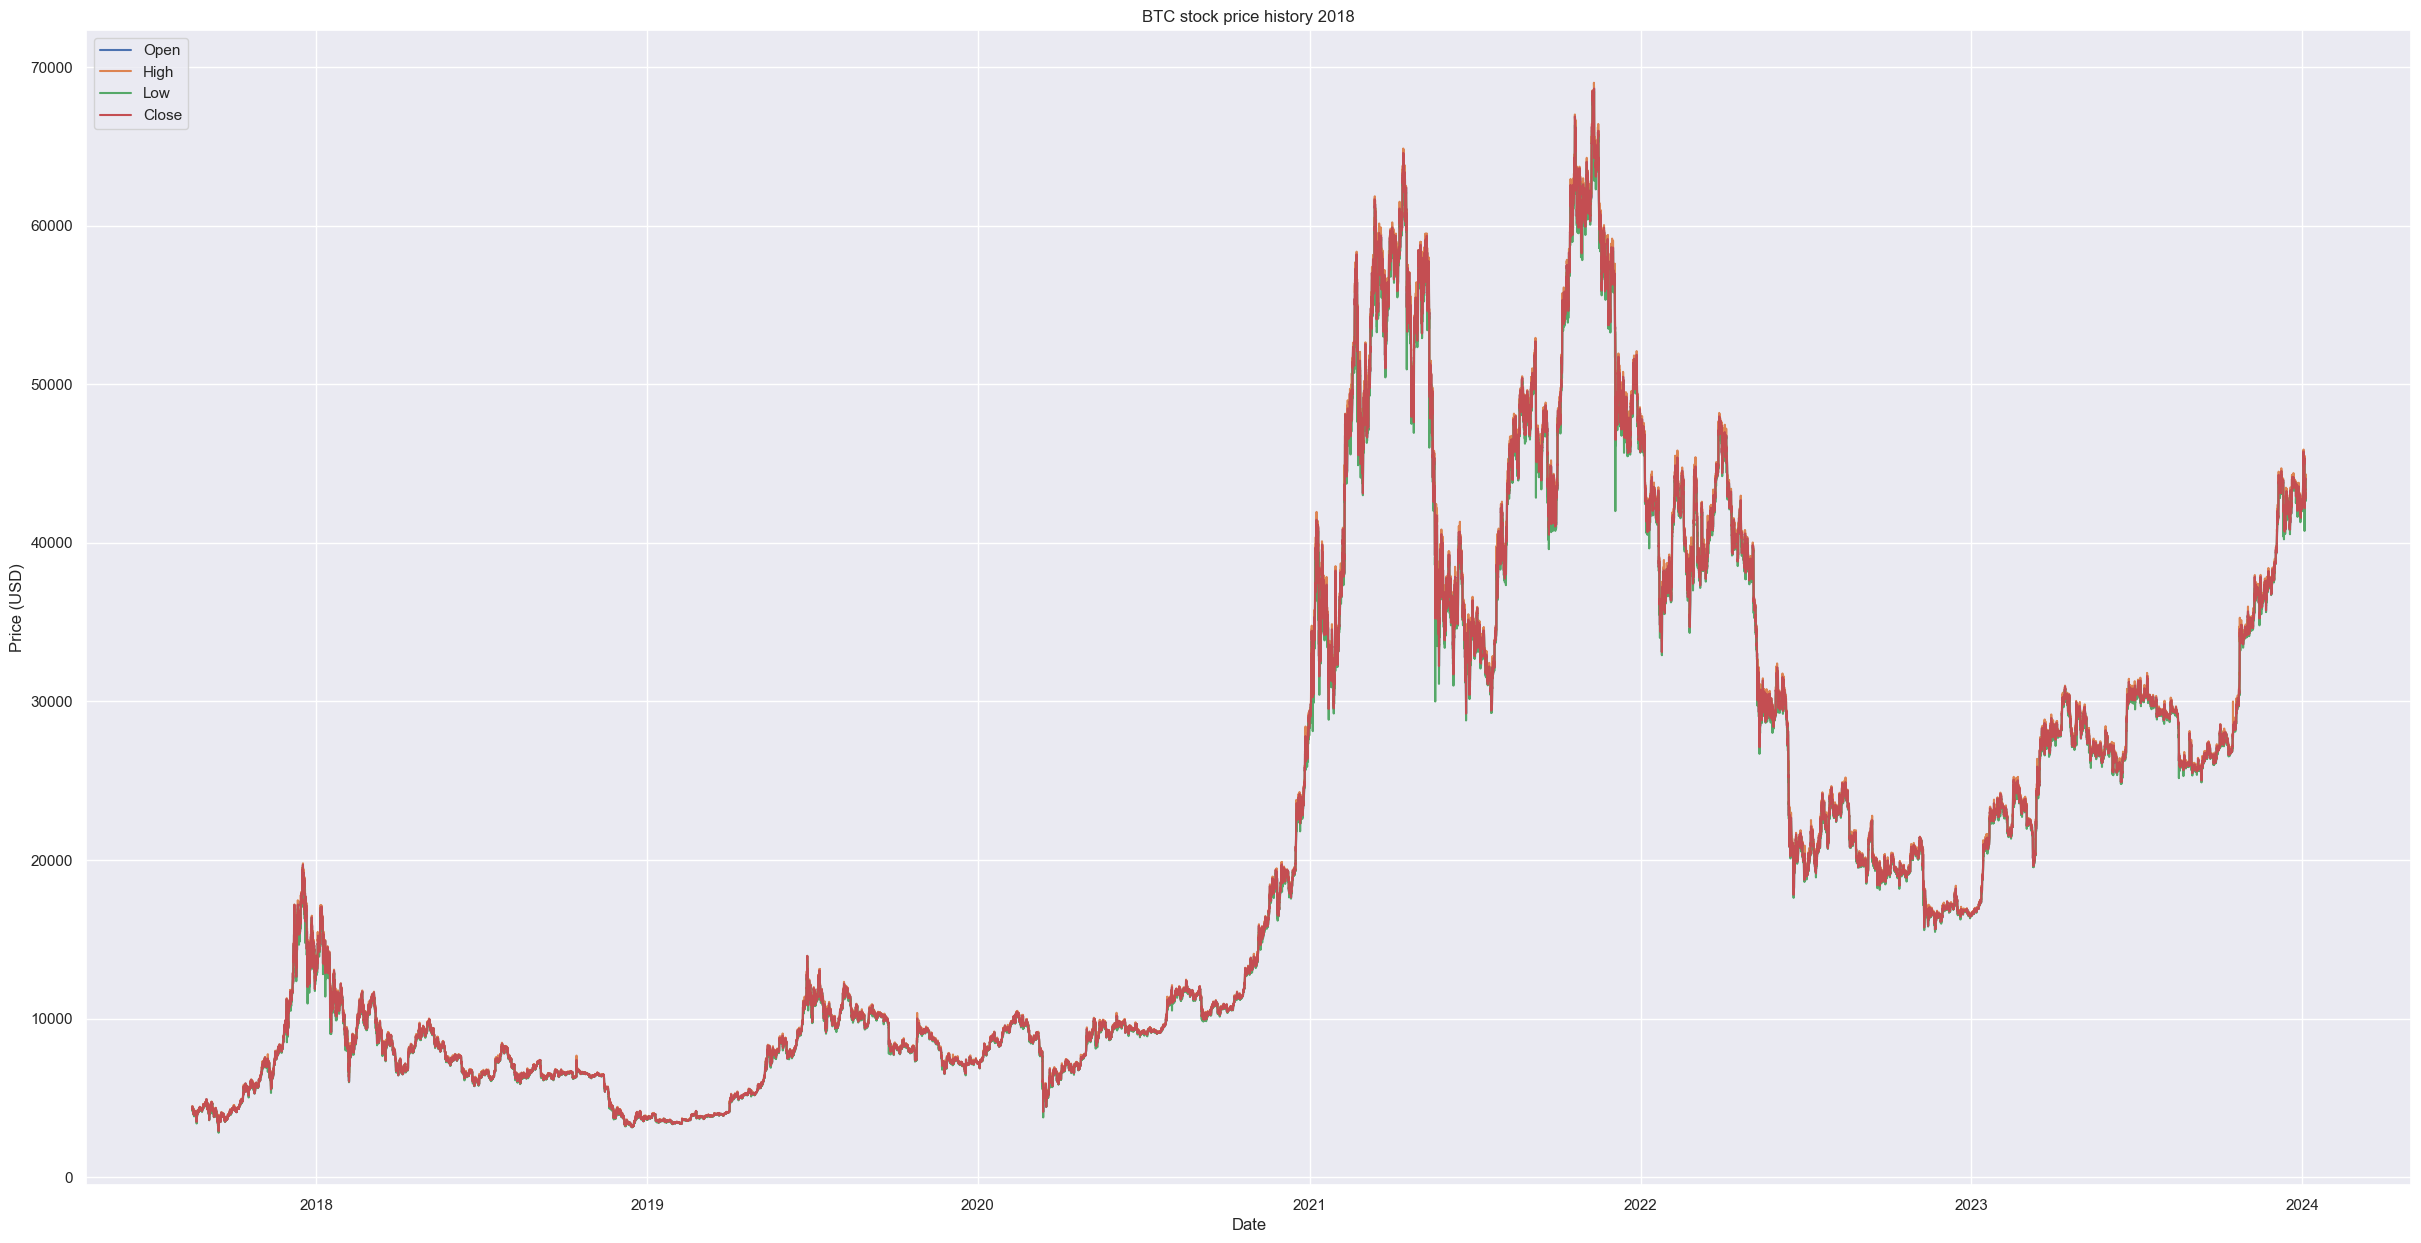

In [17]:
plt.figure(figsize=(30,15))
plt.plot(df_yfinance_full_btc["Open"])
plt.plot(df_yfinance_full_btc["High"])
plt.plot(df_yfinance_full_btc["Low"])
plt.plot(df_yfinance_full_btc["Close"])
plt.title('BTC stock price history 2018')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

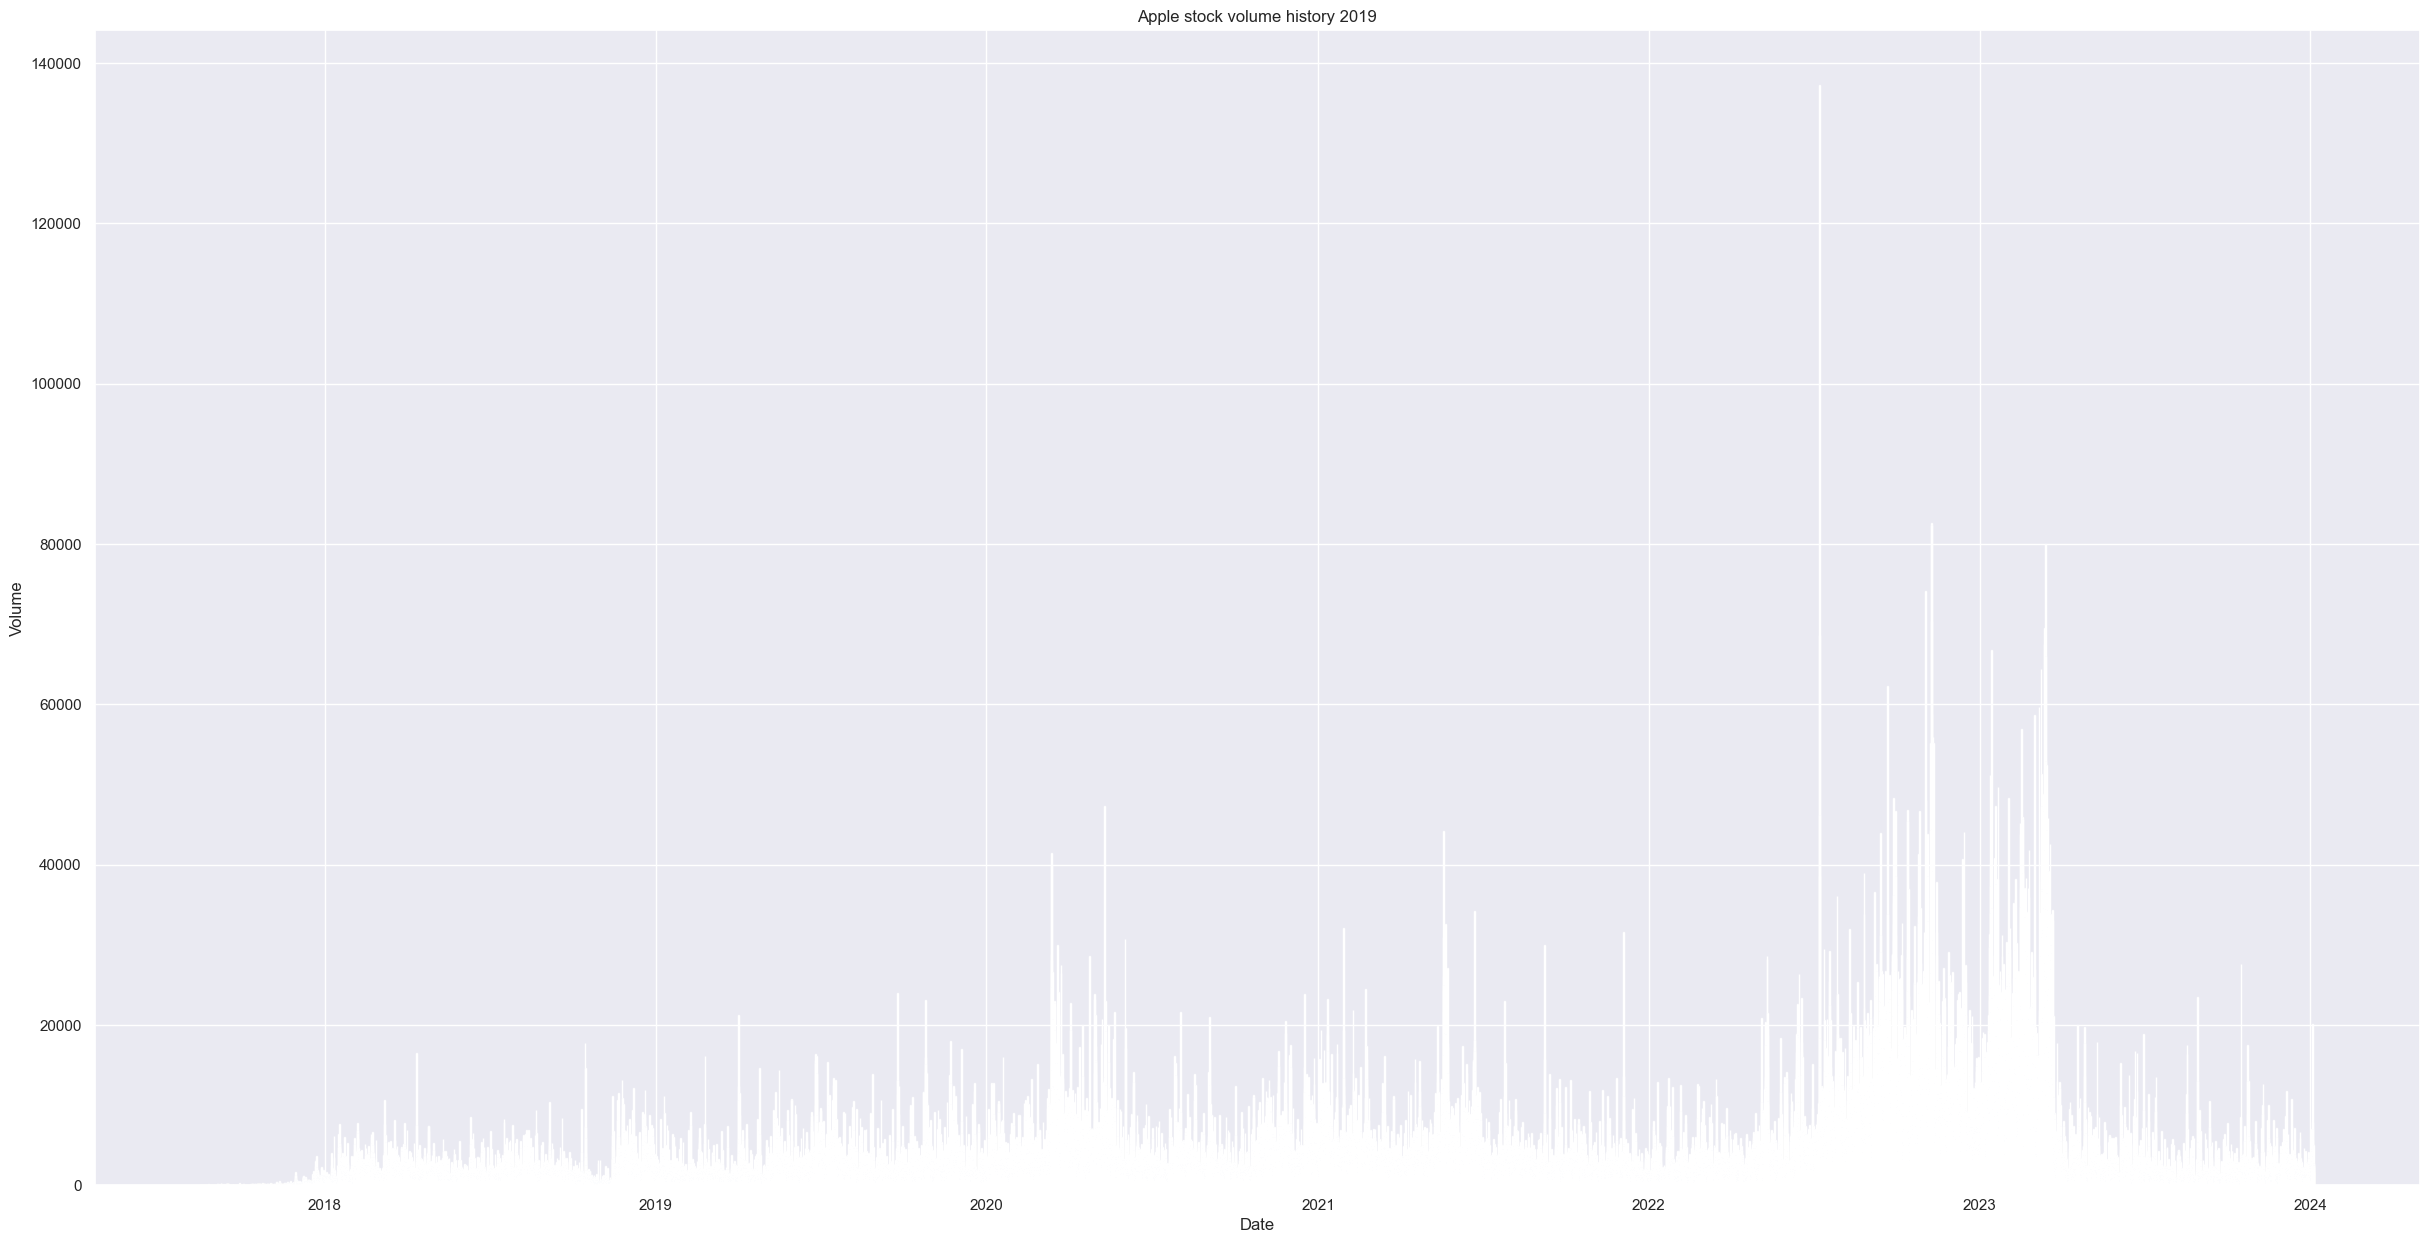

In [16]:
plt.figure(figsize=(30,15))
plt.bar(df_yfinance_full_btc.index,height=df_yfinance_full_btc["Volume"])
plt.title('Apple stock volume history 2019')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()